In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import beta, binom

plt.style.use('ggplot')

%matplotlib inline

In [2]:
from samples.testing import bayesian

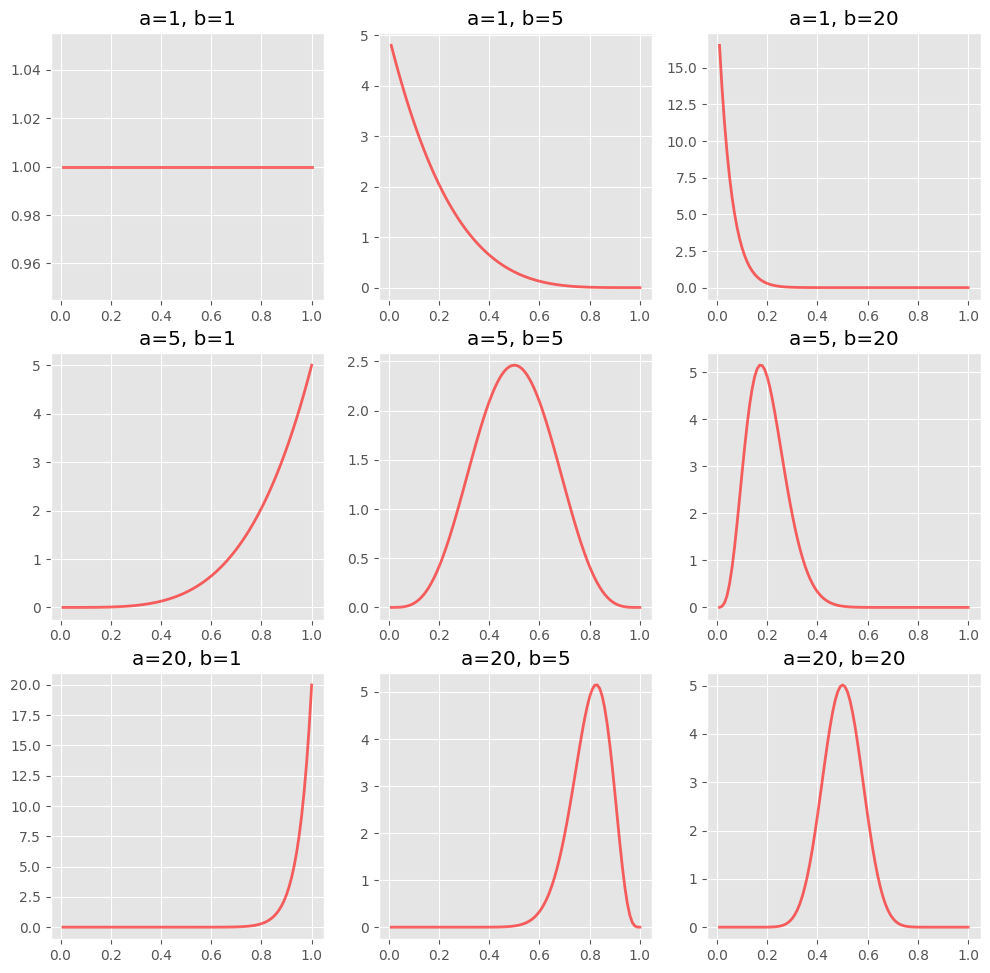

In [3]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100 

fig, ax = plt.subplots(3, 3)

x = np.linspace(0.01, 1.0, 100)

for i, i_val in enumerate([1, 5, 20]):
    for j, j_val in enumerate([1, 5, 20]):
    
        ax[i, j].plot(x, beta.pdf(x, a=i_val, b=j_val), 'r-', lw=2, alpha=0.6)
        ax[i, j].set(title='a={}, b={}'.format(i_val, j_val))


plt.show()

In [4]:
GROUP_A = 'Corgi'
GROUP_B = 'Pug'

ab_test = bayesian.BetaBinomialTest(GROUP_A, GROUP_B)

In [5]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 

ab_test.update_group_data(GROUP_A, successes=365, trials=740)
ab_test.update_group_data(GROUP_B, successes=340, trials=800)

In [6]:
ab_test.group_data

{'Corgi': {'successes': 365,
  'trials': 740,
  'sample_ratio': 0.49324324324324326,
  'failures': 375},
 'Pug': {'successes': 340,
  'trials': 800,
  'sample_ratio': 0.425,
  'failures': 460}}

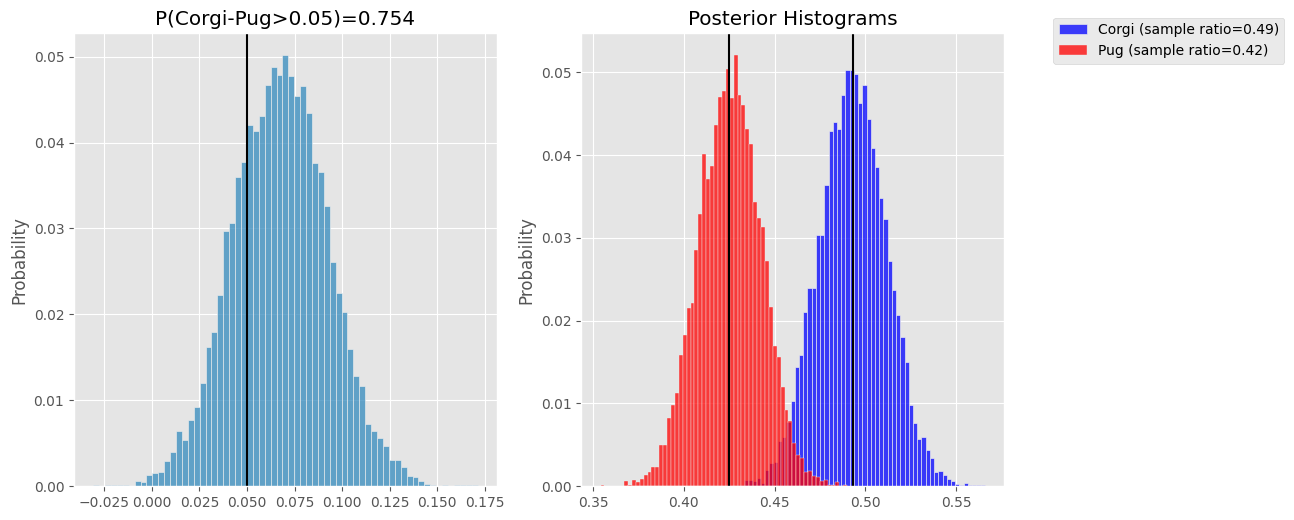

In [10]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 
prob, differences = ab_test.compare(GROUP_A, GROUP_B, margin=0.05)

<AxesSubplot:ylabel='Count'>

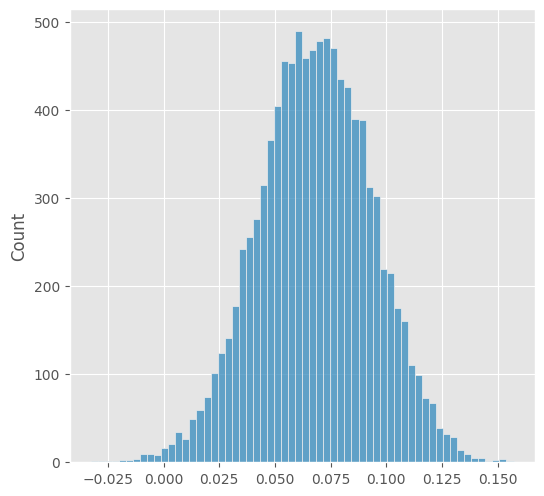

In [8]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 100 

sns.histplot(differences)